In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import reinforcement_learning as rl

In [2]:
env = rl.TextEnvironment(
    text="##########XXXXXX###\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "###  ##  #####  ###\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "#                 #\n" +
         "##########SSSSSS###",
    max_steps=100,
    neighbor=rl.TextNeighbor.MOORE,
    raw_state=True
)

In [3]:
single_train_session = rl.SingleTrainSession(env, start_step=40)

In [4]:
for _ in range(20):
    #"""
    agent = rl.SarsaLambdaAgent(
            alpha=0.1,
            epsilon=0.3,
            gamma=0.99,
            lambd=0.98,
            epsilon_decay=0.99,
            trace_type="replacing",
            feature_dims=2,
            num_tilings=4,
            tiles_size=[4,4],
        )
    """
    agent = rl.SarsaAgent(
            states=env.states,
            actions=env.actions,
            alpha=0.1,
            epsilon=0.3,
            gamma=0.99,
            epsilon_decay=0.99,
        )
    """
    single_train_session.add_agent(agent)

In [5]:
results = single_train_session.run(500, 50, 50)
results

100%|██████████| 500/500 [05:31<00:00,  1.51it/s]


,test,sample,step,agent,return_sum,wins,time,distance
0,1,1,0,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.400000
1,1,1,1,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
2,1,1,2,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
3,1,1,3,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
4,1,1,4,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
...,...,...,...,...,...,...,...,...
22263,10,49,134,"ID: 139901178893360, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22264,10,49,135,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22265,10,49,136,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22266,10,49,137,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000


In [6]:
groupby = results.drop(['return_sum', 'wins', 'time', 'distance'], axis=1).groupby(['test', 'sample', 'agent'])
arrival_time = groupby.max()
travelling_time = arrival_time - groupby.min()

In [7]:
arrival_time

step
test sample agent                                                   
1    1      ID: 139899763200928, Params: Sarsa Lambda: alph...   138
            ID: 139899763202224, Params: Sarsa Lambda: alph...   112
            ID: 139899763203520, Params: Sarsa Lambda: alph...    99
            ID: 139899763212928, Params: Sarsa Lambda: alph...   127
            ID: 139899763214224, Params: Sarsa Lambda: alph...   118
...                                                              ...
10   49     ID: 139899763286224, Params: Sarsa Lambda: alph...    45
            ID: 139899763287520, Params: Sarsa Lambda: alph...    54
            ID: 139899763288816, Params: Sarsa Lambda: alph...    63
            ID: 139901178893360, Params: Sarsa Lambda: alph...   134
            ID: 139901178894368, Params: Sarsa Lambda: alph...   114

[3980 rows x 1 columns]

In [8]:
travelling_time

step
test sample agent                                                   
1    1      ID: 139899763200928, Params: Sarsa Lambda: alph...    99
            ID: 139899763202224, Params: Sarsa Lambda: alph...    99
            ID: 139899763203520, Params: Sarsa Lambda: alph...    99
            ID: 139899763212928, Params: Sarsa Lambda: alph...    99
            ID: 139899763214224, Params: Sarsa Lambda: alph...    99
...                                                              ...
10   49     ID: 139899763286224, Params: Sarsa Lambda: alph...    29
            ID: 139899763287520, Params: Sarsa Lambda: alph...    32
            ID: 139899763288816, Params: Sarsa Lambda: alph...    30
            ID: 139901178893360, Params: Sarsa Lambda: alph...    99
            ID: 139901178894368, Params: Sarsa Lambda: alph...    99

[3980 rows x 1 columns]

In [9]:
arrival_time.loc[(10)]

step
sample agent                                                   
1      ID: 139899763200928, Params: Sarsa Lambda: alph...    74
       ID: 139899763202224, Params: Sarsa Lambda: alph...    40
       ID: 139899763203520, Params: Sarsa Lambda: alph...    54
       ID: 139899763212928, Params: Sarsa Lambda: alph...    60
       ID: 139899763214224, Params: Sarsa Lambda: alph...    42
...                                                         ...
49     ID: 139899763286224, Params: Sarsa Lambda: alph...    45
       ID: 139899763287520, Params: Sarsa Lambda: alph...    54
       ID: 139899763288816, Params: Sarsa Lambda: alph...    63
       ID: 139901178893360, Params: Sarsa Lambda: alph...   134
       ID: 139901178894368, Params: Sarsa Lambda: alph...   114

[400 rows x 1 columns]

In [10]:
travelling_time.loc[(10)]

step
sample agent                                                   
1      ID: 139899763200928, Params: Sarsa Lambda: alph...    36
       ID: 139899763202224, Params: Sarsa Lambda: alph...    36
       ID: 139899763203520, Params: Sarsa Lambda: alph...    29
       ID: 139899763212928, Params: Sarsa Lambda: alph...    30
       ID: 139899763214224, Params: Sarsa Lambda: alph...    38
...                                                         ...
49     ID: 139899763286224, Params: Sarsa Lambda: alph...    29
       ID: 139899763287520, Params: Sarsa Lambda: alph...    32
       ID: 139899763288816, Params: Sarsa Lambda: alph...    30
       ID: 139901178893360, Params: Sarsa Lambda: alph...    99
       ID: 139901178894368, Params: Sarsa Lambda: alph...    99

[400 rows x 1 columns]

In [11]:
import pandas as pd
scatter = pd.concat([arrival_time.loc[(10)], travelling_time.loc[(10)]], axis=1, sort=False)
scatter.columns = ['arrival_time', 'travelling_time']
scatter

arrival_time  \
sample agent                                                              
1      ID: 139899763200928, Params: Sarsa Lambda: alph...            74   
       ID: 139899763202224, Params: Sarsa Lambda: alph...            40   
       ID: 139899763203520, Params: Sarsa Lambda: alph...            54   
       ID: 139899763212928, Params: Sarsa Lambda: alph...            60   
       ID: 139899763214224, Params: Sarsa Lambda: alph...            42   
...                                                                 ...   
49     ID: 139899763286224, Params: Sarsa Lambda: alph...            45   
       ID: 139899763287520, Params: Sarsa Lambda: alph...            54   
       ID: 139899763288816, Params: Sarsa Lambda: alph...            63   
       ID: 139901178893360, Params: Sarsa Lambda: alph...           134   
       ID: 139901178894368, Params: Sarsa Lambda: alph...           114   

                                                           travelling_time  
sample agent                                                                
1      ID: 139899763200928, Params: Sarsa Lambda: alph...               36  
       ID: 139899763202224, Params: Sarsa Lambda: alph...               36  
       ID: 139899763203520, Params: Sarsa Lambda: alph...               29  
       ID: 139899763212928, Params: Sarsa Lambda: alph...               30  
       ID: 139899763214224, Params: Sarsa Lambda: alph...               38  
...                                                                    ...  
49     ID: 139899763286224, Params: Sarsa Lambda: alph...               29  
       ID: 139899763287520, Params: Sarsa Lambda: alph...               32  
       ID: 139899763288816, Params: Sarsa Lambda: alph...               30  
       ID: 139901178893360, Params: Sarsa Lambda: alph...               99  
       ID: 139901178894368, Params: Sarsa Lambda: alph...               99  

[400 rows x 2 columns]

In [12]:
points = [
    tuple(row)
    for _, row in scatter.iterrows()
]
points[:10]

[(74, 36),
 (40, 36),
 (54, 29),
 (60, 30),
 (42, 38),
 (64, 34),
 (108, 99),
 (102, 99),
 (43, 33),
 (83, 83)]

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

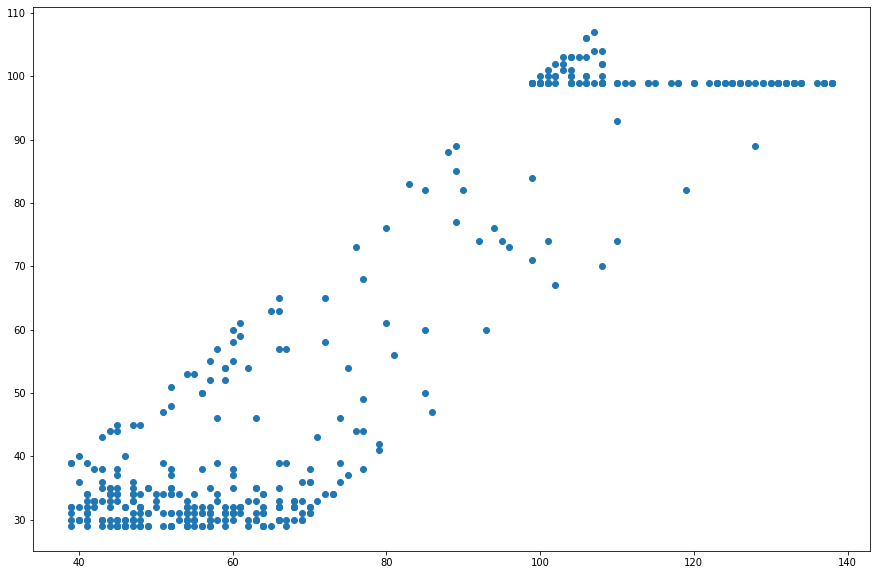

In [14]:
plt.scatter([p[0] for p in points], [p[1] for p in points])

In [15]:
results

,test,sample,step,agent,return_sum,wins,time,distance
0,1,1,0,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.400000
1,1,1,1,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
2,1,1,2,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
3,1,1,3,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
4,1,1,4,"ID: 139899763203520, Params: Sarsa Lambda: alp...",-1,0,0.25,0.565685
...,...,...,...,...,...,...,...,...
22263,10,49,134,"ID: 139901178893360, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22264,10,49,135,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22265,10,49,136,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000
22266,10,49,137,"ID: 139899763253744, Params: Sarsa Lambda: alp...",-1,0,0.25,0.000000


In [16]:
groupby = results.drop(['return_sum', 'wins', 'time', 'distance'], axis=1).groupby(['test', 'sample', 'step'])
count = groupby.count()

In [17]:
density = count / 200
density.columns = ['density']
density

density
test sample step         
1    1      0       0.005
            1       0.005
            2       0.005
            3       0.005
            4       0.010
...                   ...
10   49     134     0.015
            135     0.005
            136     0.005
            137     0.005
            138     0.005

[26896 rows x 1 columns]

In [18]:
flow = count.cumsum()['agent'].rolling(window=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
flow

test  sample  step
1     1       0       NaN
              1       1.0
              2       1.0
              3       1.0
              4       2.0
                     ... 
10    49      134     3.0
              135     1.0
              136     1.0
              137     1.0
              138     1.0
Name: agent, Length: 26896, dtype: float64

In [29]:
scatter = pd.concat([density.loc[(10, 49)], flow.loc[(10, 49)]], axis=1, sort=False)
scatter.columns = ['density', 'flow']
scatter

,density,flow
step,,
0,0.005,1.0
1,0.005,1.0
2,0.015,3.0
3,0.015,3.0
4,0.015,3.0
...,...,...
134,0.015,3.0
135,0.005,1.0
136,0.005,1.0


In [30]:
points = [
    tuple(row)
    for _, row in scatter.iterrows()
]
points[:20]

[(0.005, 1.0),
 (0.005, 1.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.015, 3.0),
 (0.02, 4.0),
 (0.02, 4.0),
 (0.02, 4.0),
 (0.025, 5.0),
 (0.025, 5.0),
 (0.03, 6.0),
 (0.035, 7.0),
 (0.04, 8.0),
 (0.045, 9.0),
 (0.045, 9.0)]

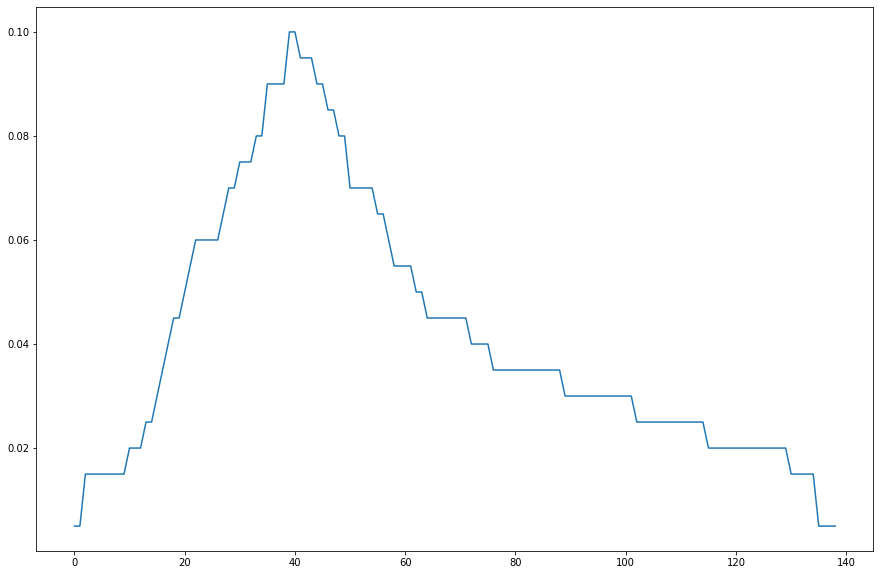

In [31]:
plt.plot(list(range(len(points))), [p[0] for p in points])

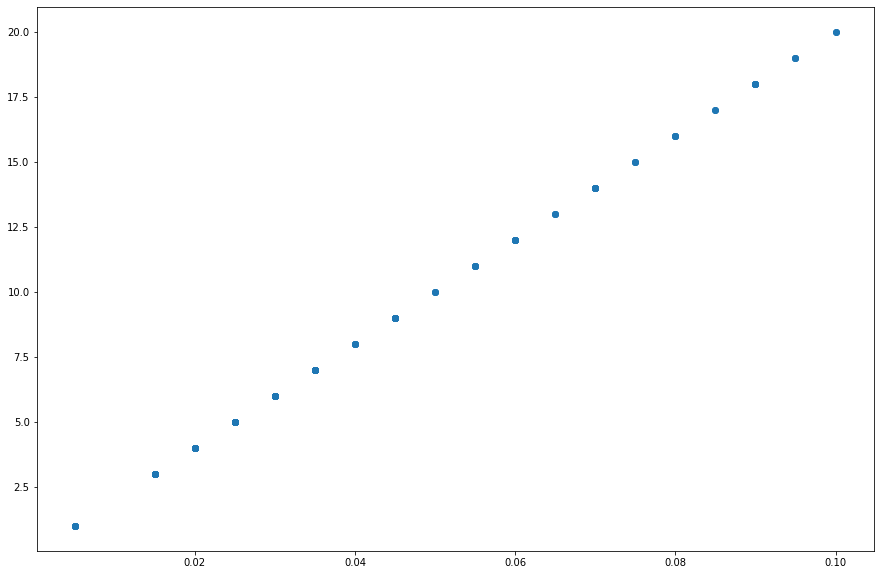

In [32]:
plt.scatter([p[0] for p in points], [p[1] for p in points])

In [33]:
groupby = results.drop(['return_sum', 'wins', 'time', 'distance', 'agent'], axis=1).groupby(['test', 'sample'])
arrival_time = groupby.max() * 0.25
arrival_time

step
test sample       
1    1       34.50
     9       33.25
     10      34.50
     12      34.50
     13      34.25
...            ...
10   37      31.50
     38      26.00
     42      32.75
     47      34.50
     49      34.50

[199 rows x 1 columns]

In [59]:
groupby = results.drop(['return_sum', 'wins', 'step'], axis=1).groupby(['test', 'sample', 'agent'])
speed = groupby.sum()
speed['speed'] = speed['distance'] / speed['time']
speed = speed.drop(['distance', 'time'], axis=1).round(decimals=1)
speed

speed
test sample agent                                                    
1    1      ID: 139899763200928, Params: Sarsa Lambda: alph...    1.7
            ID: 139899763202224, Params: Sarsa Lambda: alph...    1.9
            ID: 139899763203520, Params: Sarsa Lambda: alph...    1.8
            ID: 139899763212928, Params: Sarsa Lambda: alph...    1.7
            ID: 139899763214224, Params: Sarsa Lambda: alph...    1.8
...                                                               ...
10   49     ID: 139899763286224, Params: Sarsa Lambda: alph...    1.8
            ID: 139899763287520, Params: Sarsa Lambda: alph...    2.1
            ID: 139899763288816, Params: Sarsa Lambda: alph...    2.1
            ID: 139901178893360, Params: Sarsa Lambda: alph...    0.6
            ID: 139901178894368, Params: Sarsa Lambda: alph...    1.0

[3980 rows x 1 columns]

In [60]:
points = speed.loc[(10)]['speed'].value_counts().to_dict()
points = [
    (key, value)
    for key, value in points.items()
]
points[:10]

[(2.0, 66),
 (1.9, 49),
 (0.6, 42),
 (1.8, 33),
 (0.7, 32),
 (2.2, 27),
 (2.1, 23),
 (1.7, 20),
 (0.8, 15),
 (1.6, 14)]

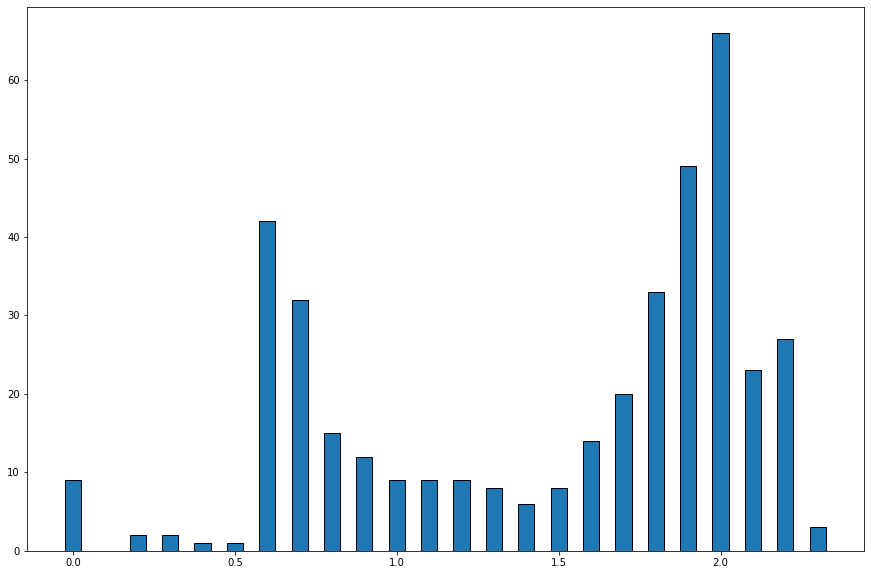

In [66]:
from datetime import datetime
plt.bar([p[0] for p in points], [p[1] for p in points], width=0.05, edgecolor="black")
plt.savefig(datetime.now().strftime("%Y%m%d_%H%M%S") + '_speed_bars.jpg')